In [4]:
# python-pptx package is needed.
from pptx import Presentation

prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Hello, World!"
subtitle.text = "python-pptx was here!"
pptx_file = 'pptx_sample/test1.pptx'
prs.save(pptx_file)

In [13]:
# Let's use a template, then populate some text using programming.
# The template can be any blank ppt files.

from pptx import Presentation
import datetime

template_file = 'pptx_sample/my_template1.pptx'
output_file = 'pptx_sample/my_output1.pptx'
prs = Presentation(template_file)

slide = prs.slides[0]
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Quarterly Report"
subtitle.text = "Generated on {:%m-%d-%Y}".format(datetime.datetime.today()) 

slide = prs.slides[1]
title = slide.shapes.title
title.text = 'This is a bullet slide.'
body_shape = slide.shapes.placeholders[1]

tf = body_shape.text_frame
tf.text = 'Following are bullet points.'

p = tf.add_paragraph()
p.text = 'This is bullet one.'
p.level = 1

p = tf.add_paragraph()
p.text = 'This is sub level for bullet one.'
p.level = 2

p = tf.add_paragraph()
p.text = 'This is bullet two.'
p.level = 1

p = tf.add_paragraph()
p.text = 'This is sub level for bullet two.'
p.level = 2


prs.save(output_file)

In [14]:

# Add a slide then add an image.
from pptx import Presentation
from pptx.util import Inches
import datetime

template_file = 'pptx_sample/my_template1.pptx'
output_file = 'pptx_sample/my_output1.pptx'
prs = Presentation(template_file)

slide = prs.slides[0]
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Quarterly Report"
subtitle.text = "Generated on {:%m-%d-%Y}".format(datetime.datetime.today())

slide = prs.slides[1]
title = slide.shapes.title
title.text = 'This is a bullet slide.'
body_shape = slide.shapes.placeholders[1]

tf = body_shape.text_frame
tf.text = 'Following are bullet points.'

p = tf.add_paragraph()
p.text = 'This is bullet one.'
p.level = 1

p = tf.add_paragraph()
p.text = 'This is sub level for bullet one.'
p.level = 2

p = tf.add_paragraph()
p.text = 'This is bullet two.'
p.level = 1

p = tf.add_paragraph()
p.text = 'This is sub level for bullet two.'
p.level = 2

# Add a slide using second page as layout page.
slide_layout = prs.slide_layouts[3]
slide = prs.slides.add_slide(slide_layout)

title = slide.shapes.title
picture_file = 'pptx_sample/picture_sample.png'
slide.shapes.add_picture(picture_file, left=Inches(2.8), top=Inches(1.3), height=Inches(4))

title.text = 'This is a slide with image.'

prs.save(output_file)

FileNotFoundError: [Errno 2] No such file or directory: 'pptx_sample/picture_sample.png'

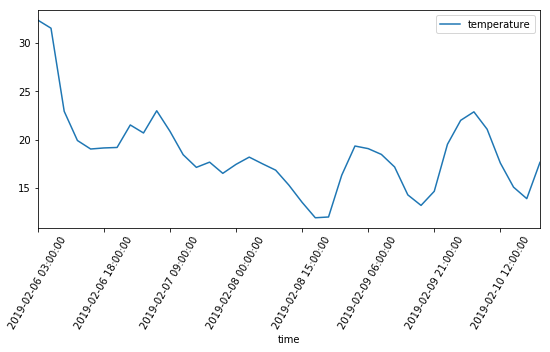

In [16]:
%matplotlib inline
# Add matplotlib generated image to the ppt.
# Interacting with web apis.
# 5 day weather forecast
# https://openweathermap.org/forecast5
import pandas as pd
import requests
import matplotlib.pyplot as plt

city = 'melbourne'
country = 'aus'
appid = 'f29164c280fc240f3a98804944423382'
url = 'http://api.openweathermap.org/data/2.5/forecast?q={},{}&units=metric&appid={}'.format(city, country, appid)

resp = requests.get(url)
weather_data = resp.json()
abstracted_data = [
    (weather['dt_txt'], weather['main']['temp'])
    for weather in weather_data['list']]
columns = ['time', 'temperature']
df = pd.DataFrame(abstracted_data, columns=columns)
% matplotlib inline
df = pd.DataFrame(abstracted_data, columns=columns)
df.plot(figsize=(9, 4), x='time', rot=60)


In [5]:
from io import BytesIO
image_stream = BytesIO()
plt.savefig(image_stream)

<Figure size 432x288 with 0 Axes>

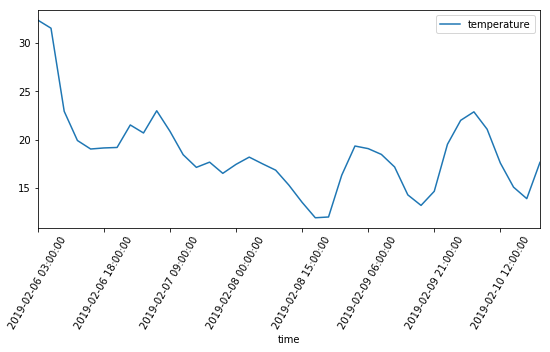

In [27]:
# Now add them together.

# Add a slide then add an image.
from pptx import Presentation
from pptx.util import Inches
import datetime
import pandas as pd
import requests
import matplotlib.pyplot as plt
from io import BytesIO

city = 'melbourne'
country = 'aus'
appid = 'f29164c280fc240f3a98804944423382'
url = 'http://api.openweathermap.org/data/2.5/forecast?q={},{}&units=metric&appid={}'.format(city, country, appid)

resp = requests.get(url)
weather_data = resp.json()
abstracted_data = [
    (weather['dt_txt'], weather['main']['temp'])
    for weather in weather_data['list']]
columns = ['time', 'temperature']
df = pd.DataFrame(abstracted_data, columns=columns)
plot = df.plot(figsize=(9, 4), x='time', rot=60)
fig = plot.get_figure()
image_stream = BytesIO()
fig.savefig(image_stream)

template_file = 'pptx_sample/my_template1.pptx'
output_file = 'pptx_sample/my_weather_report.pptx'
prs = Presentation(template_file)

# Front page. First slide.
slide = prs.slides[0]
title = slide.shapes.title
subtitle = slide.placeholders[1]
title.text = "Quarterly Report"
subtitle.text = "Generated on {:%Y-%m-%d}".format(datetime.datetime.today())

# This is the second slide.
slide = prs.slides[1]
title = slide.shapes.title
title.text = 'This is a bullet slide.'
body_shape = slide.shapes.placeholders[1]

tf = body_shape.text_frame
tf.text = 'Following are bullet points.'

p = tf.add_paragraph()
p.text = 'This is bullet one.'
p.level = 1

p = tf.add_paragraph()
p.text = 'This is sub level for bullet one.'
p.level = 2

p = tf.add_paragraph()
p.text = 'This is bullet two.'
p.level = 1

p = tf.add_paragraph()
p.text = 'This is sub level for bullet two.'
p.level = 2

# 3rd slide.
# Add a slide using second page as layout page.
slide_layout = prs.slide_layouts[3]
slide = prs.slides.add_slide(slide_layout)

title = slide.shapes.title
title.text = 'This is a slide with image.'
slide.shapes.add_picture(image_stream, left=Inches(0.5), top=Inches(1.3), height=Inches(4))

prs.save(output_file)
